<a href="https://colab.research.google.com/github/ravikiraniitm17/my_git/blob/master/wine_multi_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import sklearn

In [0]:
from sklearn.datasets import load_wine

dataset = load_wine()
X = dataset.data
y = dataset.target

print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [0]:
from keras.utils.np_utils import to_categorical

y_categorical = to_categorical(y)

In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y_categorical, test_size = 0.3)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(24, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
h = model.fit(x_train, y_train, epochs = 100, batch_size = 30, validation_data = (x_test, y_test))


Train on 124 samples, validate on 54 samples
Epoch 1/100
124/124 [==============================] - 0s 2ms/step - loss: 1.2502 - accuracy: 0.3468 - val_loss: 0.8959 - val_accuracy: 0.5741
Epoch 2/100
124/124 [==============================] - 0s 81us/step - loss: 1.1021 - accuracy: 0.4758 - val_loss: 0.8157 - val_accuracy: 0.7037
Epoch 3/100
124/124 [==============================] - 0s 103us/step - loss: 1.0139 - accuracy: 0.5403 - val_loss: 0.7466 - val_accuracy: 0.7037
Epoch 4/100
124/124 [==============================] - 0s 86us/step - loss: 0.9310 - accuracy: 0.5726 - val_loss: 0.6983 - val_accuracy: 0.7593
Epoch 5/100
124/124 [==============================] - 0s 84us/step - loss: 0.8697 - accuracy: 0.6048 - val_loss: 0.6514 - val_accuracy: 0.7593
Epoch 6/100
124/124 [==============================] - 0s 82us/step - loss: 0.8120 - accuracy: 0.6371 - val_loss: 0.6117 - val_accuracy: 0.7963
Epoch 7/100
124/124 [==============================] - 0s 83us/step - loss: 0.7569 - accura

In [0]:
predictionss = model.predict(x_test)

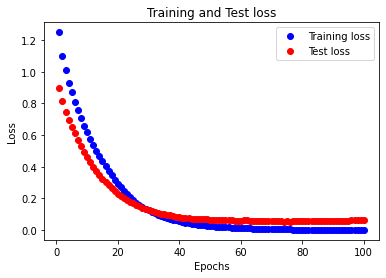

In [0]:
# plotting loss

import matplotlib.pyplot as plt

history_dict =  h.history

train_loss = history_dict['loss']
test_loss = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy'])+1)

plt.plot(epochs, train_loss, 'bo', label = 'Training loss')
plt.plot(epochs, test_loss, 'ro', label = 'Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

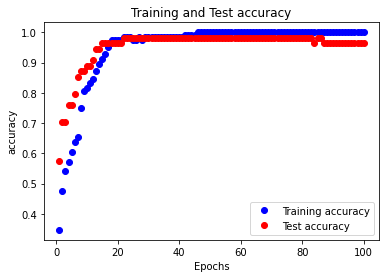

In [0]:
# plotting accuracy

history_dict =  h.history

train_loss = history_dict['accuracy']
test_loss = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy'])+1)

plt.plot(epochs, train_loss, 'bo', label = 'Training accuracy')
plt.plot(epochs, test_loss, 'ro', label = 'Test accuracy')
plt.title('Training and Test accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()